Workgroup 2

# Potential Outcomes and RCTs

#### Group 3: Dube, V., Garay, E. Guerrero, J., Villalba, M.

## Multicollinearity

Multicolinearity occurs when two or more predictors in a regresion model are highly correlated to one another, causing a higher variance our the estimated coefficients. To understand the way multicollinearity affects our regresion we can examine the composition of the variance of our estimates. 

Considering the partitioned regression model:

\begin{align*}
    Y &= X\beta + \epsilon \\
    Y &= X_1\beta_1 + X_2\beta_2 + \epsilon
\end{align*}

We know that the OLS estimator will solve this equation:

\begin{align*}
(X'X)\hat{\beta} &=X'Y \\

\begin{bmatrix}
  X_1'X_1      & X_1'X_2   \\
  X_2'X_1      & X_2'X_2 
\end{bmatrix}
\begin{bmatrix}
\hat{\beta_1} \\
\hat{\beta_2}
\end{bmatrix}
& =
\begin{bmatrix}
X_1'Y \\
X_2'Y
\end{bmatrix}
\end{align*}

This, because of the Frisch-Whaugh-Lovell Theorem, yields:

\begin{align*}
  \hat{\beta_1} &= (X_1'M_2X_1)^{-1}X_1'M_2Y
\end{align*}

Where $M_2 = I - X_2(X_2'X_2)^{-1}X_2'$, is the orthogonal projection matrix to $X_2$.

Note that $M_2$ is symmetric, idempotent, and that any variable premultiplied by it yields the residual from from running $X_2$ on that variable. For an arbitrary variable $Z$:

\begin{align*}
  M_2Z &= (I - X_2(X_2'X_2)^{-1}X_2')Z \\
  &= Z - X_2(X_2'X_2)^{-1}X_2'Z \\
  &= Z - X_2\hat{\omega} \\
  &= Z - \hat{Z} \\
  &= e_{Z}
\end{align*}

Where $e_{Z}$ and $\hat{\omega} \equiv (X_2'X_2)^{-1}X_2'Z$ come from the regresion: $$ Z = X_2\hat{\omega} + e_{Z}$$

In a sense, the $M_2$ matrix cleanses or "filters out" our $Z$ variable, keeping only the part which is orthogonal to $X_2$.

For $\hat{\beta_1}$ this implies (note that $M_2X_2$ yields 0):

\begin{align*}
  \hat{\beta_1} &= (X_1'M_2X_1)^{-1}X_1'M_2Y \\
  &= (X_1'M_2X_1)^{-1}X_1'M_2(X_1\beta_1 + X_2\beta_2 + \epsilon) \\
  &= \beta_1 + (X_1'M_2X_1)^{-1}X_1'M_2\epsilon 
\end{align*}

For the conditional variance of $\hat{\beta_1}$ this has great implications:

\begin{align*}
  Var(\hat{\beta_1}|X) &= Var(\beta_1 + (X_1'M_2X_1)^{-1}X_1'M_2\epsilon|X) \\
  &= Var((X_1'M_2X_1)^{-1}X_1'M_2\epsilon|X) \\
  &= E[((X_1'M_2X_1)^{-1}X_1'M_2\epsilon)((X_1'M_2X_1)^{-1}X_1'M_2\epsilon)'|X] \\
  &= E[(X_1'M_2X_1)^{-1}X_1'M_2\epsilon\epsilon'M_2'X_1(X_1'M_2'X_1)^{-1}|X] \\
  &= (X_1'M_2X_1)^{-1}X_1'M_2E[\epsilon\epsilon'|X]M_2'X_1(X_1'M_2'X_1)^{-1}
\end{align*}

Under the traditional assumption that $E[\epsilon\epsilon'|X] = \sigma^2I$:

\begin{align*}
 Var(\hat{\beta_1}|X) &= \sigma^2(X_1'M_2X_1)^{-1}X_1'M_2M_2'X_1(X_1'M_2'X_1)^{-1} \\
&= \sigma^2(X_1'M_2'X_1)^{-1}
\end{align*}

Remembering that the variance of $X_1$ can be decomposed into two positive components:

\begin{align*}
  X_1 &= X_2\alpha + v \\
  Var(X_1) &= Var(X_2\alpha) + Var(v) \\
  Var(X_1) - Var(X_2\alpha) &= Var(v) \\
  E[X_1'X_1] - Var(X_2\alpha) &= E[X_1'M_2'X_1]
\end{align*}

Thus, necessarily: $$E[X_1'M_2X_1] \leq E[X_1'X_1]$$ 

Altogether this could mean: $$\sigma_0^2(X_1'X_1)^{-1} \leq \sigma^2(X_1'M_2'X_1)^{-1}$$

This shows that controlling for $X_2$ in our regresion might in fact increase the variance of $\hat{\beta_1}$ by limiting us to the "usable" variance of $X_1$ which is orthogonal to $X_2$.

Of course, this is without considering that we might need to control for $X_2$ in order to account for potencial endogeneity induced by ommited variables. Thus this racionale only applies clearly when the inclusion of the confounder is "optional" (ie. $X_1$ is randomly assigned).

### Perfectly collinear regressors example

In [11]:
using LinearAlgebra
using Random

Random.seed!(0)
matrix = randn(10, 9)

10×9 Matrix{Float64}:
 -0.231909   -0.269885  -1.07458   …  -0.57796     0.27262    0.849341
  0.94039     0.578004  -1.38197      -1.78676     1.23521   -0.210716
  0.596762    1.16034    0.951853     -1.36705     1.11072   -0.143171
  1.99782     0.287888  -0.292291      0.660498    1.85158   -0.121578
 -0.0515618  -0.441193   0.328946      0.0371086  -0.131821   0.47354
  1.17224     0.134576  -0.495999  …   0.877644   -0.406776  -0.0923911
 -1.69681     0.165543   0.22277       1.79296    -0.379297  -0.550621
 -2.11615    -1.0721    -1.66125      -1.35785    -0.499403  -0.474732
  0.558366   -1.26016    1.92524      -1.48326    -0.635276   0.237598
 -0.86473     0.196408  -1.04847       0.475453    2.28402    0.100588

In [12]:
coefficients = [1, 1, 1]
selected_columns = [1, 5, 9]
matrix = hcat(matrix, matrix[:, selected_columns] * coefficients)

10×10 Matrix{Float64}:
 -0.231909   -0.269885  -1.07458   …   0.27262    0.849341    0.100641
  0.94039     0.578004  -1.38197       1.23521   -0.210716   -0.828557
  0.596762    1.16034    0.951853      1.11072   -0.143171   -0.510355
  1.99782     0.287888  -0.292291      1.85158   -0.121578    3.1357
 -0.0515618  -0.441193   0.328946     -0.131821   0.47354    -0.951298
  1.17224     0.134576  -0.495999  …  -0.406776  -0.0923911   0.815082
 -1.69681     0.165543   0.22277      -0.379297  -0.550621   -1.00174
 -2.11615    -1.0721    -1.66125      -0.499403  -0.474732   -2.84605
  0.558366   -1.26016    1.92524      -0.635276   0.237598    2.11939
 -0.86473     0.196408  -1.04847       2.28402    0.100588   -0.864591

In [14]:
det(matrix)

-2.548968811760904e-14

In [13]:
inv_matrix = inv(matrix)

10×10 Matrix{Float64}:
  4.21177e15   3.21803e15   2.84373e15  …   5.35458e15   2.48399e15
  0.35937      0.106139     0.159937       -0.497513    -0.629165
 -1.9799      -1.79593     -0.971094       -2.79778     -1.85628
  0.382724    -0.282216     0.588743        0.183997     0.0466157
  4.21177e15   3.21803e15   2.84373e15      5.35458e15   2.48399e15
 -3.02412     -2.49823     -2.12259     …  -4.6385      -2.89822
 -1.40691     -1.3032      -0.896793       -2.0195      -0.996493
 -1.28789     -0.920547    -0.753483       -1.62345     -0.682825
  4.21177e15   3.21803e15   2.84373e15      5.35458e15   2.48399e15
 -4.21177e15  -3.21803e15  -2.84373e15     -5.35458e15  -2.48399e15

## Analyzing RCT data with precision adjustment

## A crash course in good and bad controls

In this section, we will explore different scenarios where we need to decide whether the inclusion of a control variable, denoted by _Z_, will help (or not) to improve the estimation of the **average treatment effect** (ATE) of treatment _X_ on outcome _Y_. The effect of observed variables will be represented by a continuous line, while that of unobserved variables will be represented by and discontinuous line.

In [11]:
# import Pkg; Pkg.add("GraphPlot")
# import Pkg; Pkg.add("Compose")
# import Pkg; Pkg.add("Cairo")
# import Pkg; Pkg.add("Fontconfig")
# import Pkg; Pkg.add("Colors")
# import Pkg; Pkg.add("Graphs")
# Pkg.add("CausalInference")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
Precompiling project...
  ? MLJ


In [1]:
# Libraries
using Graphs, GraphPlot
using Compose, Cairo, Fontconfig
using Colors
using DataFrames, GLM

import Random

#### Good control (Blocking back-door paths)

**Model 1** 

We will assume that _X_ measures whether or not the student attends the extra tutoring session, that affects the student's grade (_Y_). Then, we have another observable variable, as hours of the student sleep (_Z_), that impacts _X_ and _Y_. Theory says that when controlling by _Z_, we block the back-door path from _X_ to _Y_. Thus, we see that in the second regression, the coefficient of _X_ is closer to the real one (3.03339 ≈ 3).

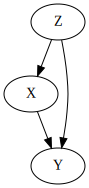

In [5]:
# Define the graph with 3 nodes
g = SimpleDiGraph(3)
add_edge!(g, 1, 2)  # X -> Y
add_edge!(g, 3, 1)  # Z -> X
add_edge!(g, 3, 2)  # Z -> Y

# Node labels for X, Y, Z
nodelabel = ["X", "Y", "Z"]

# Define node colors based on labels
nodefillc_dict = Dict("X" => colorant"turquoise",
                      "Y" => colorant"turquoise",
                      "Z" => colorant"turquoise")

nodefillc = [nodefillc_dict[label] for label in nodelabel]

# Create the graph plot
g_plot = gplot(g,
               nodefillc = nodefillc,
               nodestrokec = "black",
               nodestrokelw = 0,
               nodelabel = nodelabel,
               NODESIZE = 0.15,
               NODELABELSIZE = 10,
               edgestrokec = "black")

# Save and display the plot
draw(PNG("causal_discovery_1.png", 13cm, 13cm), g_plot)
g_plot

In [2]:
# Set seed
Random.seed!(24)

# Generate data
n = 1000
Z = rand(Normal(0, 1), n)
X = 5 * Z + rand(Normal(0, 1), n)
Y = 3 * X + 1.5 * Z + rand(Normal(0, 1), n)

# Create dataframe
df = DataFrame(Z = Z, X = X, Y = Y)

,Z,X,Y
,Float64,Float64,Float64
1,0.121698,-0.646629,-2.17627
2,-0.0329104,2.15083,5.12964
3,-1.86593,-8.56013,-28.4291
4,-0.402004,-3.37725,-10.4183
5,0.298821,2.03012,5.97373
6,1.88838,8.48632,29.592
7,-0.998066,-4.56851,-14.6436
8,-1.11586,-4.5261,-15.5884
9,-0.558549,-2.6828,-10.8751


In [3]:
# Wrong regression, not controlling by the confounder Z
lm(@formula(Y ~ X), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
──────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  0.021246  0.032701      0.65    0.5160  -0.0429246  0.0854166
X            3.29515   0.00623332  528.63    <1e-99   3.28291    3.30738
──────────────────────────────────────────────────────────────────────────

In [4]:
# Correct regression
lm(@formula(Y ~ X + Z), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  0.0102651   0.0315753   0.33    0.7452  -0.0516965  0.0722268
X            3.03339     0.0307871  98.53    <1e-99   2.97297    3.0938
Z            1.35458     0.156251    8.67    <1e-16   1.04796    1.6612
──────────────────────────────────────────────────────────────────────────

**Model 2** 

We will assume that _X_ stands for the police salaries that affect the crime rate (_Y_). Then, we have another observable variable, as the policemen's supply (_Z_), that impacts _X_ but not _Y_. And, additionally, we know that there is an unobservable variable (_U_), as the preference for maintaining civil order, that affects _Z_ and _Y_. The theory says that when controlling by _Z_, we block (some) of the unobservable variable’s back-door path from _X_ to _Y_. Thus, we see that in the second regression, the coefficient of _X_ is equal to the real one (0.5).

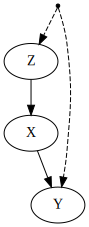

In [8]:
# Define the graph with 4 nodes: U, Z, X, Y
g = SimpleDiGraph(4)
add_edge!(g, 1, 4)  # U -> Y
add_edge!(g, 1, 2)  # U -> Z
add_edge!(g, 2, 3)  # Z -> X
add_edge!(g, 3, 4)  # X -> Y

# Node labels for U, Z, X, Y
nodelabel = ["U", "Z", "X", "Y"]

# Define node colors based on labels
nodefillc_dict = Dict("U" => colorant"lightgrey",
                      "Z" => colorant"turquoise",
                      "X" => colorant"turquoise",
                      "Y" => colorant"turquoise")

nodefillc = [nodefillc_dict[label] for label in nodelabel]

# Create the graph plot
g_plot = gplot(g,
               nodefillc = nodefillc,
               nodestrokec = "black",
               nodestrokelw = 0,
               nodelabel = nodelabel,
               NODESIZE = 0.15,
               NODELABELSIZE = 10,
               edgestrokec = "black")

# Save and display the plot
draw(PNG("causal_graph.png", 13cm, 13cm), g_plot)
g_plot

In [26]:
# Set seed
Random.seed!(24)

# Generate data
n = 1000
U = rand(Normal(0, 1), n)
Z = 7 * U + rand(Normal(0, 1), n)
X = 2 * Z + rand(Normal(0, 1), n)
Y = 0.5 * X + 0.2 * U + rand(Normal(0, 1), n)

# Create dataframe
df = DataFrame(Z = Z, X = X, Y = Y, U = U)

,Z,X,Y,U
,Float64,Float64,Float64,Float64
1,-0.403233,-1.2254,-2.2511,0.121698
2,2.08501,2.89654,1.13287,-0.0329104
3,-12.292,-24.5338,-12.1042,-1.86593
4,-4.18126,-8.04607,-4.90671,-0.402004
5,2.62777,4.69066,2.44994,0.298821
6,12.2631,25.8266,13.0174,1.88838
7,-6.56464,-12.5702,-6.84891,-0.998066
8,-6.75783,-13.8519,-7.02647,-1.11586
9,-3.7999,-9.58863,-4.76023,-0.558549


In [27]:
# Wrong regression, not controlling by the confounder Z
lm(@formula(Y ~ X), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0337287  0.0307735    -1.10    0.2733  -0.0941169  0.0266596
X             0.514806   0.00210354  244.73    <1e-99   0.510678   0.518934
────────────────────────────────────────────────────────────────────────────

In [28]:
# Controlling by the confounder Z
lm(@formula(Y ~ X + Z), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
──────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0327959   0.0306374  -1.07    0.2847  -0.092917  0.0273253
X             0.417904    0.0307391  13.60    <1e-38   0.357583  0.478225
Z             0.195056    0.0617315   3.16    0.0016   0.073917  0.316194
──────────────────────────────────────────────────────────────────────────

#### Bad Control (M-bias)

**Model 7** 

Let us suppose that _X_ stands for a job training program aimed at reducing unemployment. Then, there is a first unobserved confounder, which could be the planning effort and good design of the job program (_U1_) that impacts directly on the participation in job training programs (_X_) and the proximity of job programs (that would be the bad control _Z_). Furthermore, we have another unobserved confounder (_U2_), as the soft skills of the unemployed, that affects the employment status of individuals (_Y_) and the likelihood of beeing in a job training program that is closer (_Z_). That is why including _Z_ in the second regression makes _X_ coefficient value further to the real one.

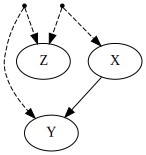

In [11]:
# Define the graph with 5 nodes: U1, U2, Z, X, Y
g = SimpleDiGraph(5)
add_edge!(g, 1, 3)  # U1 -> Z
add_edge!(g, 1, 4)  # U1 -> X
add_edge!(g, 2, 3)  # U2 -> Z
add_edge!(g, 2, 5)  # U2 -> Y
add_edge!(g, 4, 5)  # X -> Y

# Node labels for U1, U2, Z, X, Y
nodelabel = ["U1", "U2", "Z", "X", "Y"]

# Define node colors based on labels
nodefillc_dict = Dict("U1" => colorant"lightgrey",
                      "U2" => colorant"lightgrey",
                      "Z" => colorant"turquoise",
                      "X" => colorant"turquoise",
                      "Y" => colorant"turquoise")

nodefillc = [nodefillc_dict[label] for label in nodelabel]

# Create the graph plot
g_plot = gplot(g,
               nodefillc = nodefillc,
               nodestrokec = "black",
               nodestrokelw = 0,
               nodelabel = nodelabel,
               NODESIZE = 0.15,
               NODELABELSIZE = 10,
               edgestrokec = "black")

# Save and display the plot
draw(PNG("causal_graph.png", 13cm, 13cm), g_plot)
g_plot

In [23]:
# Set seed
Random.seed!(24)

# Generate data
n = 1000
U1 = rand(Normal(0, 1), n)
U2 = rand(Normal(0, 1), n)
Z = 0.3 * U1 + 0.9 * U2 + rand(Normal(0, 1), n)
X = 4 * U1 + rand(Normal(0, 1), n)
Y = 3 * X + U2 + rand(Normal(0, 1), n)

# Create dataframe
df = DataFrame(Z = Z, X = X, Y = Y, U1 = U1, U2 = U2)

,Z,X,Y,U1,U2
,Float64,Float64,Float64,Float64,Float64
1,-1.51203,-1.17595,-5.82291,0.121698,-1.25512
2,0.800487,-0.440459,1.23247,-0.0329104,2.31538
3,0.182939,-6.92784,-20.038,-1.86593,0.769514
4,-1.03465,-2.41129,-8.13353,-0.402004,-1.36723
5,0.00718558,1.24013,4.10467,0.298821,0.53602
6,1.00698,7.27991,19.8046,1.88838,-0.955557
7,0.639282,-4.35645,-12.425,-0.998066,0.421824
8,0.276855,-4.34078,-11.7458,-1.11586,1.0532
9,-2.05745,-2.0884,-6.33028,-0.558549,0.109943


In [24]:
# Wrong regression, not controlling by the confounder Z
lm(@formula(Y ~ X), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0121698   0.0470352   -0.26    0.7959  -0.104469  0.0801295
X             2.98862     0.0110309  270.93    <1e-99   2.96698   3.01027
───────────────────────────────────────────────────────────────────────────

In [25]:
# Controlling by the confounder Z
lm(@formula(Y ~ X + Z), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.0022004  0.0409946     0.05    0.9572  -0.0782452   0.082646
X            2.95344    0.00981324  300.96    <1e-99   2.93418     2.9727
Z            0.526533   0.0295594    17.81    <1e-61   0.468528    0.584539
───────────────────────────────────────────────────────────────────────────

#### Neutral Control (possibly good for precision)

**Model 8** 

In this scenario, we will assume that _X_ represents the implementation of a new government policy to provide subsidies and guidance for small companies. There is another variable, _Z_, that stands for the % inflation rate. And both _X_ and _Z_ affect _Y_, which represents the GDP growth rate of the country. Then, even if _Z_ does not impact _X_, its inclusion improves the precision of the ATE estimator (8.63339 is closer to 8.6).

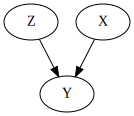

In [14]:
# Define the graph with 3 nodes: Z, X, Y
g = SimpleDiGraph(3)
add_edge!(g, 1, 3)  # Z -> Y
add_edge!(g, 2, 3)  # X -> Y

# Node labels for Z, X, Y
nodelabel = ["Z", "X", "Y"]

# Define node colors based on labels
nodefillc_dict = Dict("Z" => colorant"turquoise",
                      "X" => colorant"turquoise",
                      "Y" => colorant"turquoise")

nodefillc = [nodefillc_dict[label] for label in nodelabel]

# Create the graph plot
g_plot = gplot(g,
               nodefillc = nodefillc,
               nodestrokec = "black",
               nodestrokelw = 0,
               nodelabel = nodelabel,
               NODESIZE = 0.15,
               NODELABELSIZE = 10,
               edgestrokec = "black")

# Save and display the plot
draw(PNG("causal_graph.png", 13cm, 13cm), g_plot)
g_plot

In [31]:
# Set seed
Random.seed!(24)

# Generate data
n = 1000
Z = rand(Normal(0, 1), n)
X = rand(Normal(0, 1), n)
Y = 8.6 * X + 5 * Z + rand(Normal(0, 1), n)

# Create dataframe
df = DataFrame(Z = Z, X = X, Y = Y)

,Z,X,Y
,Float64,Float64,Float64
1,0.121698,-1.25512,-10.6044
2,-0.0329104,2.31538,18.4743
3,-1.86593,0.769514,-2.66167
4,-0.402004,-1.36723,-13.4518
5,0.298821,0.53602,5.539
6,1.88838,-0.955557,2.52455
7,-0.998066,0.421824,-0.803581
8,-1.11586,1.0532,3.14196
9,-0.558549,0.109943,-3.83607


In [32]:
# Wrong regression, not controlling by the confounder Z
lm(@formula(Y ~ X), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
──────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0115351    0.167397  -0.07    0.9451  -0.340025   0.316955
X             8.5183       0.163177  52.20    <1e-99   8.19809    8.83851
──────────────────────────────────────────────────────────────────────────

In [33]:
# Controlling by the confounder Z
lm(@formula(Y ~ X + Z), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.0102651   0.0315753    0.33    0.7452  -0.0516965  0.0722268
X            8.63339     0.0307871  280.42    <1e-99   8.57297    8.6938
Z            5.02152     0.0305298  164.48    <1e-99   4.96161    5.08143
───────────────────────────────────────────────────────────────────────────

#### Bad Controls (Bias amplification)

**Model 10** 

Let us assume that _X_ measures the implementation of a housing program for young adults buying their first house, which impacts the average housing prices (_Y_). There is another observable variable, _Z_, that measures the expenditure of the program and affects only _X_. Also, there is an unobservable variable (_U_) that represents the preference of young adults to move from their parent's house and impacts only _X_ and _Y_. Therefore, the inclusion of _Z_ will "amplify the bias" of (•) on _X_, so the ATE estimator will be worse. We can see that in the second regression, the estimator (0.833083) is much farther from the real value (0.8).

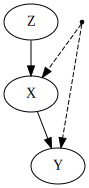

In [17]:
# Define the graph with 4 nodes: U, Z, X, Y
g = SimpleDiGraph(4)
add_edge!(g, 1, 3)  # U -> X
add_edge!(g, 1, 4)  # U -> Y
add_edge!(g, 2, 3)  # Z -> X
add_edge!(g, 3, 4)  # X -> Y

# Node labels for U, Z, X, Y
nodelabel = ["U", "Z", "X", "Y"]

# Define node colors based on labels
nodefillc_dict = Dict("U" => colorant"lightgrey",
                      "Z" => colorant"turquoise",
                      "X" => colorant"turquoise",
                      "Y" => colorant"turquoise")

nodefillc = [nodefillc_dict[label] for label in nodelabel]

# Create the graph plot
g_plot = gplot(g,
               nodefillc = nodefillc,
               nodestrokec = "black",
               nodestrokelw = 0,
               nodelabel = nodelabel,
               NODESIZE = 0.15,
               NODELABELSIZE = 10,
               edgestrokec = "black")

# Save and display the plot
draw(PNG("causal_graph.png", 13cm, 13cm), g_plot)
g_plot

In [34]:
# Set seed
Random.seed!(24)

# Generate data
n = 1000
U = rand(Normal(0, 1), n)
Z = rand(Normal(0, 1), n)
X = 3 * Z + 6 * U + rand(Normal(0, 1), n)
Y = 0.8 * X + 0.2 * U + rand(Normal(0, 1), n)

# Create dataframe
df = DataFrame(U = U, Z = Z, X = X, Y = Y)

,U,Z,X,Y
,Float64,Float64,Float64,Float64
1,0.121698,-1.25512,-3.4541,-4.40168
2,-0.0329104,2.31538,5.4752,4.06476
3,-1.86593,0.769514,-8.83687,-6.90681
4,-0.402004,-1.36723,-6.19727,-5.84149
5,0.298821,0.53602,2.83611,2.3735
6,1.88838,-0.955557,9.76405,7.91532
7,-0.998066,0.421824,-4.16386,-3.89489
8,-1.11586,1.0532,-3.87183,-3.19797
9,-0.558549,0.109943,-5.0103,-3.97415


In [35]:
# Wrong regression, not controlling by the confounder Z
lm(@formula(Y ~ X), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0317809  0.0309595    -1.03    0.3049  -0.0925341  0.0289723
X             0.827152   0.00444388  186.13    <1e-99   0.818432   0.835872
────────────────────────────────────────────────────────────────────────────

In [36]:
lm(@formula(Y ~ X + Z), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)   Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0349805  0.0308707    -1.13    0.2574  -0.0955594   0.0255984
X             0.833083   0.00489468  170.20    <1e-99   0.823478    0.842688
Z            -0.0946024  0.0332626    -2.84    0.0045  -0.159875   -0.0293297
─────────────────────────────────────────────────────────────────────────────